In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import seaborn as sns

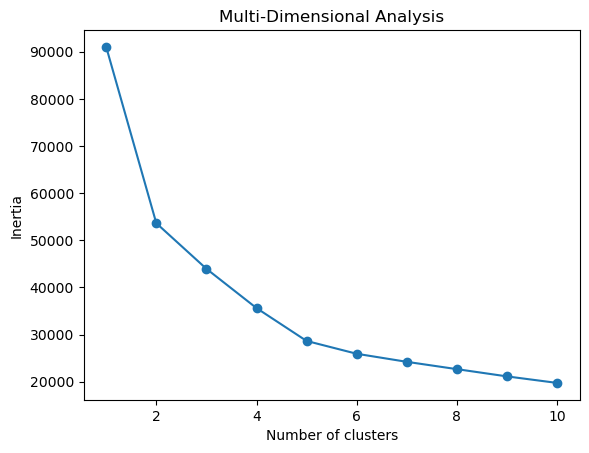

15173

In [2]:
num = 'X'

file_to_read = 'normalized_Feature_NewFilled1week-Pair1DLC_dlcrnetms5_californiamouseMay31shuffle1_70000_el.csv'
fea = pd.read_csv(file_to_read)

nose_to_nose = fea['nose_to_nose']
noseA_to_rearB = fea['noseA_to_rearB']
noseB_to_rearA = fea['noseB_to_rearA']
proximity = fea['proximity']
velocity_A = fea['velocity_A']
velocity_B = fea['velocity_B']
angle_AtoB = fea['angle_AtoB']
angle_BtoA = fea['angle_BtoA']
speed_diff = fea['speed_diff']

# choose the features needed to perform clustering
data = list(zip(proximity,noseA_to_rearB,noseB_to_rearA,nose_to_nose,velocity_A,velocity_B))
data = np.array(data)
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Multi-Dimensional Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
data.shape[0]

In [ ]:
# can choose whether reduce the 2-D or 3-D

#tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=5000, learning_rate=200)
tsne = TSNE(n_components=3, verbose=1, perplexity=25, n_iter=5000, learning_rate=200)

tsne_scale_results = tsne.fit_transform(data)

#tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2','tsne3'])

plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

/opt/miniconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 15173 samples in 0.006s...
[t-SNE] Computed neighbors for 15173 samples in 0.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15173
[t-SNE] Computed conditional probabilities for sample 2000 / 15173
[t-SNE] Computed conditional probabilities for sample 3000 / 15173
[t-SNE] Computed conditional probabilities for sample 4000 / 15173
[t-SNE] Computed conditional probabilities for sample 5000 / 15173
[t-SNE] Computed conditional probabilities for sample 6000 / 15173
[t-SNE] Computed conditional probabilities for sample 7000 / 15173
[t-SNE] Computed conditional probabilities for sample 8000 / 15173
[t-SNE] Computed conditional probabilities for sample 9000 / 15173
[t-SNE] Computed conditional probabilities for sample 10000 / 15173
[t-SNE] Computed conditional probabilities for sample 11000 / 15173
[t-SNE] Computed conditional probabilities for sample 12000 / 15173
[t-SNE] Computed conditional probabilities for sam

In [ ]:
from sklearn.metrics import silhouette_score

kmeans_tsne_scale = KMeans(n_clusters=3, n_init=100, max_iter=400, init='k-means++', random_state=42).fit(tsne_df_scale)
print('KMeans tSNE Scaled Silhouette Score: {}'.format(silhouette_score(tsne_df_scale, kmeans_tsne_scale.labels_, metric='euclidean')))
labels_tsne_scale = kmeans_tsne_scale.labels_
clusters_tsne_scale = pd.concat([tsne_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne_scale})], axis=1)

In [ ]:
# plot 2-D representation

plt.figure(figsize = (15,15))
plt.scatter(clusters_tsne_scale.iloc[:,0],clusters_tsne_scale.iloc[:,1],alpha=0.25, c=labels_tsne_scale)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('The Kmeans Clustering regrading positional information after T-SNE')
plt.show()

In [ ]:
# plot 3-D representation

import plotly.graph_objs as go

Scene = dict(xaxis = dict(title  = 'tsne1'),yaxis = dict(title  = 'tsne2'),zaxis = dict(title  = 'tsne3'))
labels = labels_tsne_scale
trace = go.Scatter3d(x=clusters_tsne_scale.iloc[:,0], y=clusters_tsne_scale.iloc[:,1], z=clusters_tsne_scale.iloc[:,2], mode='markers',marker=dict(color = labels, colorscale='Viridis', size = 10, line = dict(color = 'yellow',width = 5)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

In [ ]:
print(1111)